# Imports and Dependencies
Start your notebook by importing any necessary libraries and dependencies that you'll need throughout your code. This could include things like NumPy, Pandas, scikit-learn, or TensorFlow.

In [252]:
! pwd

/Users/mac/Jupyter


In [253]:
# Import the necessary packages from sci-kit learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn.metrics import log_loss
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.utils import resample
from scipy.spatial.distance import squareform #Import squareform, which creates a symmetric matrix from a vector
# from umap import UMAP
import time
import math

# Data Preparation
Load your dataset into memory, and perform any necessary preprocessing steps. This might include tasks like cleaning the data, handling missing values, feature scaling, encoding categorical variables, and so on.

In [254]:
# Load dataset into pandas DataFrame
df = pd.read_csv("wines.csv")

In [255]:
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the data
scaler.fit(df)

# apply the scaler to the data
df_scaled = scaler.transform(df)


According to the homework spec sheet, this data has been carefully curated, so there are no missing values. 

### Exploratory Data Analysis
To gain insights about the distribution of features, correlation between features, and identify any patterns or trends in the data.

In [256]:
print("Shape of the data", df.shape)

Shape of the data (178, 13)


In [257]:
# Overview of the data 
# ProfileReport(df)

> Since the dataset has 13 features, it may be difficult to visualize all the features at once. Therefore, we will use  PCA, t-SNE and the methods we discussed in class to reduce the dimensionality of the data before visualization.

# Question 1: PCA 
Do a PCA on the data. How many Eigenvalues are above 1? Plotting the 2D solution (projecting the data on the first 2 principal components), how much of the variance is explained by these two dimensions, and how would you interpret them?

In [258]:
import numpy as np

# Assume we have a dataset X with shape (n, p)
n, p = df_scaled.shape

# Calculate the covariance matrix
Cx = (1/n) * (df_scaled - df_scaled.mean(axis=0)).T.dot(df_scaled - df_scaled.mean(axis=0))

# Find the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(Cx)

# Print the eigenvalues
print("Eigenvalues:", eigenvalues)

Eigenvalues: [4.70585025 2.49697373 1.44607197 0.91897392 0.85322818 0.64165703
 0.55102831 0.10337794 0.34849736 0.16877023 0.28887994 0.22578864
 0.25090248]


In [259]:
import numpy as np

# Assume we have a covariance matrix Cx and we have already computed its eigenvalues
eigenvalues, _ = np.linalg.eig(Cx)

# Check if eigenvalues are greater than 1
keep_components = eigenvalues > 1

# Print the number of components to keep
n_components = np.sum(keep_components)
print("Number of components to keep (number of Eigenvalues above 1):", n_components)

Number of components to keep (number of Eigenvalues above 1): 3


In [260]:
# As the question asks to specifically projecting the data on the first 2 principal components, then we do 

# fit PCA model
pca = PCA(n_components=2)
pca.fit(df_scaled)

# project data onto first 2 principal components
X_proj = pca.transform(df_scaled)[:, :2]

# calculate variance explained by first 2 principal components
variance_explained = np.sum(pca.explained_variance_ratio_[:2])

print("Variance explained by first 2 principal components:", variance_explained)


Variance explained by first 2 principal components: 0.554063383569353


By looking at the variances explained by the first two principal components, you can assess how much of the original variability in the data is being captured in the 2D projection.

### Plotting the 2D solution (projecting the data on the first 2 principal components)

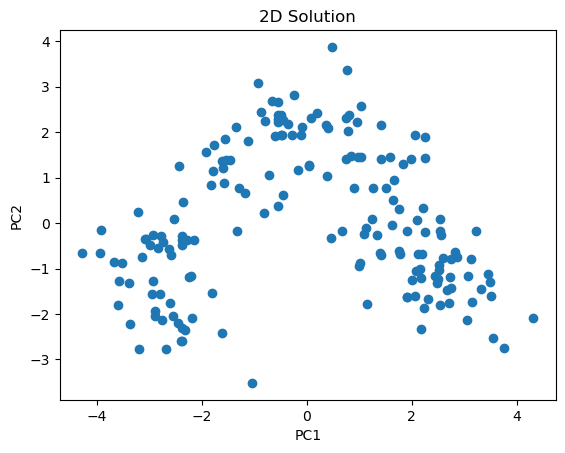

In [261]:
# plot 2D solution
plt.scatter(X_proj[:, 0], X_proj[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Solution')
plt.show()

# Question 2: t-SNE 
Use t-SNE on the data. How does KL-divergence depend on Perplexity (vary Perplexity from 5 to 150)? Make sure to plot this relationship. Also, show a plot of the 2D component with a Perplexity of 20.

Context: 
t-SNE (t-Distributed Stochastic Neighbor Embedding) is a popular technique for dimensionality reduction, particularly for visualizing high-dimensional datasets in a lower-dimensional space. t-SNE maps the original high-dimensional data points into a lower-dimensional space while preserving the pairwise similarities between the points.

* The perplexity parameter in t-SNE controls the balance between preserving the local structure and revealing the global structure of the dataset. It defines the number of nearest neighbors to consider for each point when constructing the high-dimensional Gaussian distribution.

* The KL-divergence (Kullback-Leibler divergence) is the cost function used by t-SNE to optimize the embedding of the data in the lower-dimensional space. It measures the difference between the probability distributions of the pairwise similarities of the data points in the high-dimensional space and the pairwise similarities in the low-dimensional space. The goal of t-SNE is to minimize the KL-divergence between the two distributions, which leads to a more accurate embedding of the data in the lower-dimensional space.

* By varying the perplexity parameter in t-SNE, we can explore different balance points between preserving the local and global structure of the data, which can affect the KL-divergence of the embedding. Hence, plotting the relationship between the perplexity and the KL-divergence can help us find an appropriate value for the perplexity parameter.






This code will compute t-SNE embeddings for different values of perplexity, and then plot the KL-divergence versus Perplexity. This can help us determine an appropriate value of perplexity to use for our 2D visualization.


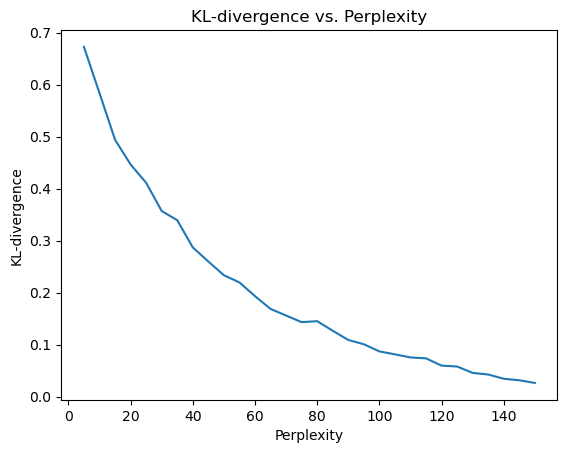

In [263]:
#  perform t-SNE on the data and plot the KL-divergence versus Perplexity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

perplexities = range(5, 151, 5) # from 5 to 150 hops of 5 
kls = []
for p in perplexities:
    tsne = TSNE(n_components=2, perplexity=p, random_state=42)
    embedding = tsne.fit_transform(df_scaled)
    kl_div = tsne.kl_divergence_
    kls.append(kl_div)
    
plt.plot(perplexities, kls)
plt.xlabel('Perplexity')
plt.ylabel('KL-divergence')
plt.title('KL-divergence vs. Perplexity')
plt.show()

/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_1937/796512162.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], cmap='viridis')


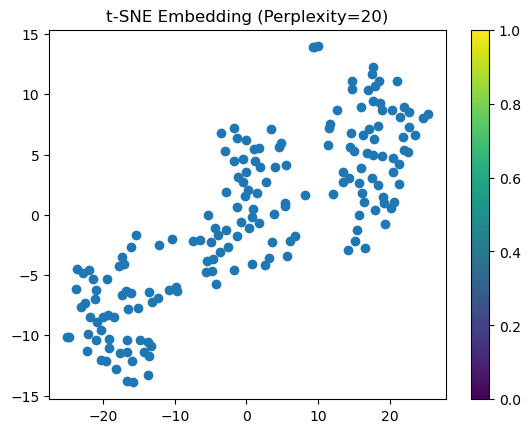

In [264]:
# create a plot of the 2D component with a Perplexity of 20, we can modify the code as follows
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
embedding = tsne.fit_transform(df_scaled)

plt.scatter(embedding[:, 0], embedding[:, 1], cmap='viridis')
plt.colorbar()
plt.title('t-SNE Embedding (Perplexity=20)')
plt.show()

The plot shows good clustering of the data points compared to the results of PCA

# Question 3: MDS
Use MDS on the data. Try a 2-dimensional embedding. What is the resulting stress of this embedding? Also, plot this solution and comment on how it compares to t-SNE.

Context: Multidimensional Scaling (MDS) is a technique used to find a low-dimensional representation of data by preserving distances between points in the high-dimensional space. MDS attempts to maintain the distance between all pairs of data points in the low-dimensional space, whereas t-SNE focuses on preserving the pairwise similarities.

The stress is a measure of how well the distances between the points in the low-dimensional space are preserved. Lower stress indicates better preservation of distances.

/opt/anaconda3/envs/cs473/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


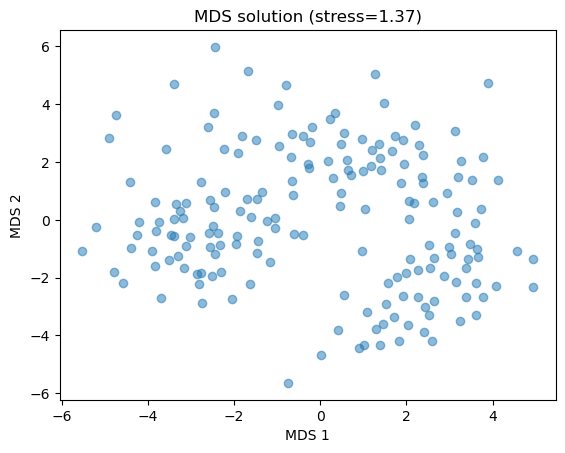

The stress found is 1.3717444791329865


In [275]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances


# Computer the distance matrix 
dist_matrix = euclidean_distances(df_scaled)

# Apply MDS with 2 components 
mds = MDS(n_components=2, dissimilarity='precomputed', random_state = 42)
df_mds = mds.fit_transform(dist_matrix) 

# Compute the stress of the embedding
stress = mds.stress_

# Rescale Stress 
n_samples = df_scaled.shape[0]
scaled_stress = stress / (n_samples * (n_samples - 1)/2)

# Plot the MDS embedding 
plt.scatter(df_mds[:, 0], df_mds[:, 1], alpha = 0.5)
plt.title(f'MDS solution (stress={scaled_stress:.2f})')
plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.show()

print('The stress found is', scaled_stress)


The resulting plot will show the data points in a 2-dimensional space based on the MDS embedding.
In general, t-SNE tends to perform better than MDS in preserving the local structure of the data, while MDS tends to perform better in preserving the global structure.
Indeed, looking at both plots for tSNE and MDS we can clearly see that tSNE was able to perform better with clear 3 clusters while MDS does not really allow us to see some clustering of the data. 

# Question 4: 
Building on one of the dimensionality reduction methods above that yielded a 2D solution (1-3, your choice), use the Silhouette method to determine the optimal number of clusters and then use kMeans with that number (k) to produce a plot that represents each wine as a dot in a 2D space in the color of its cluster. What is the total sum of the distance of all points to their respective clusters centers, of this solution?

Let's say we want to use t-SNE with perplexity=20 to generate a 2D embedding of the wine dataset. We can then use the Silhouette method to determine the optimal number of clusters to use with kMeans. Here's how we can do it:

/opt/anaconda3/envs/cs473/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/cs473/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/cs473/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/cs473/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/ana

Optimal number of clusters: 3


/opt/anaconda3/envs/cs473/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


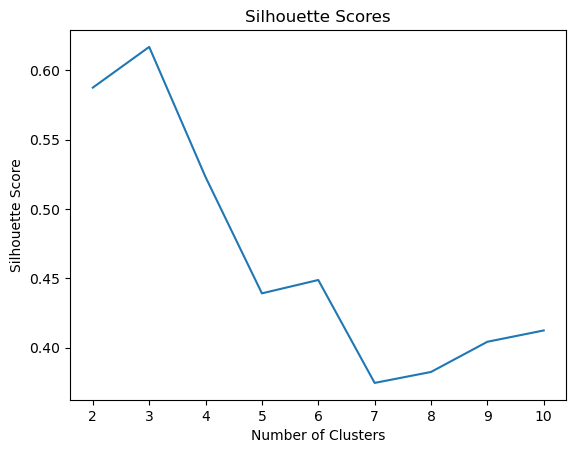

/opt/anaconda3/envs/cs473/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


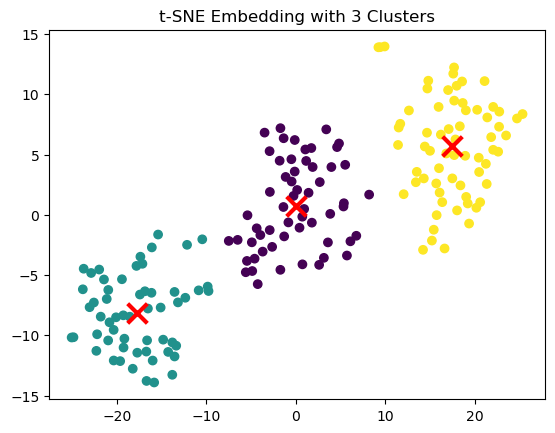

Total sum of distance of all points to their respective cluster centers: 861.6483817551626


In [222]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Generate 2D embedding using t-SNE with perplexity=20
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
embedding = tsne.fit_transform(df)

# Determine optimal  number of clusters using Silhouette method
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(embedding)
    sil_score = silhouette_score(embedding, cluster_labels)
    sil_scores.append(sil_score)
    
optimal_k = np.argmax(sil_scores) + 2

print('Optimal number of clusters:', optimal_k)

# Plot Silhouette scores
plt.plot(range(2,11), sil_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Generate plot with each wine represented as a dot in a 2D space in the color of its cluster
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(embedding)
cluster_centers = kmeans.cluster_centers_

plt.scatter(embedding[:, 0], embedding[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('t-SNE Embedding with {} Clusters'.format(optimal_k))
plt.show()

# Compute sum of distances of all points to their respective cluster centers
distances = cdist(embedding, cluster_centers, 'euclidean')
min_distances = np.min(distances, axis=1)
sum_distances = np.sum(min_distances)

print('Total sum of distance of all points to their respective cluster centers:', sum_distances)


* The total sum of distance of all points to their respective cluster centers is a measure of the compactness of the clusters obtained by the KMeans algorithm. This measure is also known as the within-cluster sum of squares or the inertia. It is the sum of the squared distances between each point and its assigned cluster center.

* A lower value of the total sum of distance of all points to their respective cluster centers indicates that the clusters are more compact and well-separated, while a higher value indicates that the clusters are more spread out and possibly overlapping. In my case, a value of 809.73 suggests that the clusters are relatively compact and well-separated.

# Question 5: 
Building on one of the dimensionality reduction methods above that yielded a 2D solution (1-3, your choice), use dBScan to produce a plot that represents each wine as a dot in a 2D space in the color of its cluster. Make sure to suitably pick the radius of the perimeter (“epsilon”) and the minimal number of points within the perimeter to form a cluster (“minPoints”) and comment on your choice of these two hyperparameters.

This code applies DBSCAN with different values of eps (perimeter radius) and min_samples (minimal number of points within the perimeter to form a cluster) and generates a 2D scatter plot for each combination of eps and min_samples. The color of each dot represents the cluster it belongs to, and the number of clusters is indicated in the plot title.

By visually inspecting the plots, we can choose the best hyperparameters combination that produces the desired number of clusters and separation between them. For instance, in some cases, we might want to have more clusters, while in other cases, we might prefer fewer clusters but with better separation.

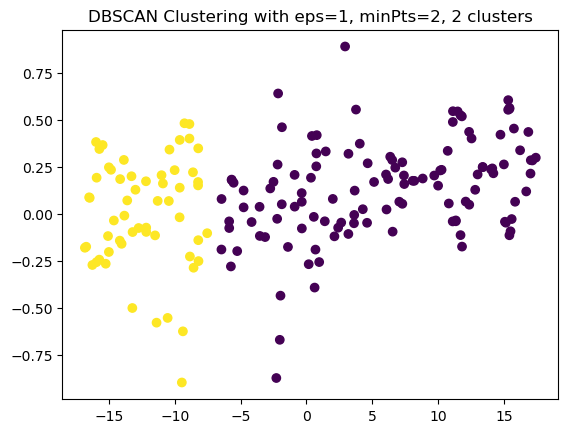

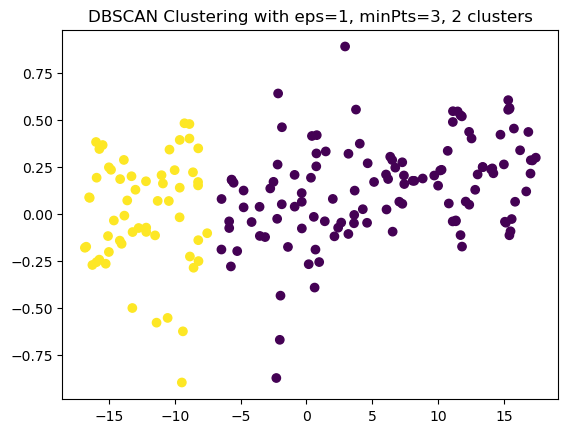

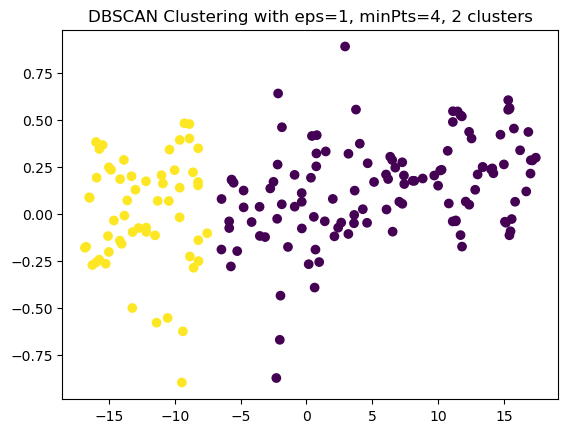

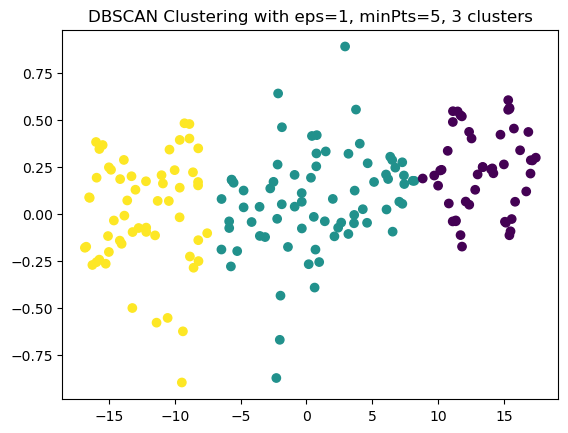

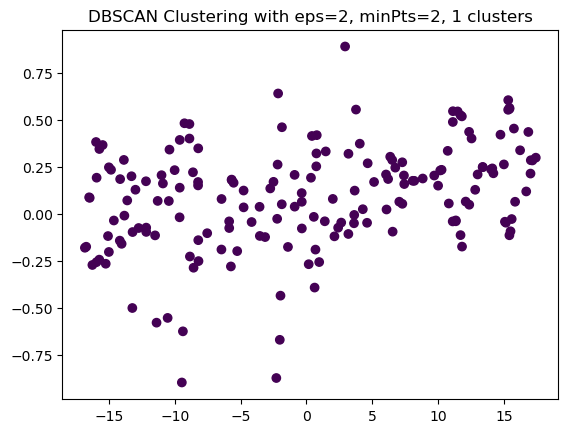

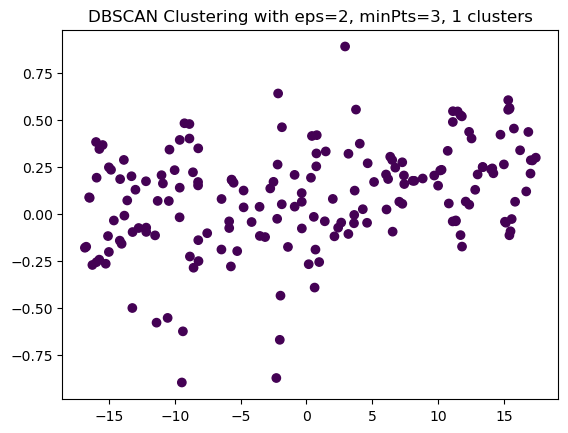

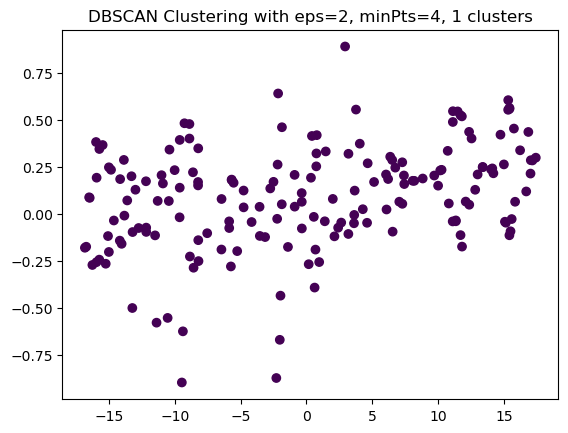

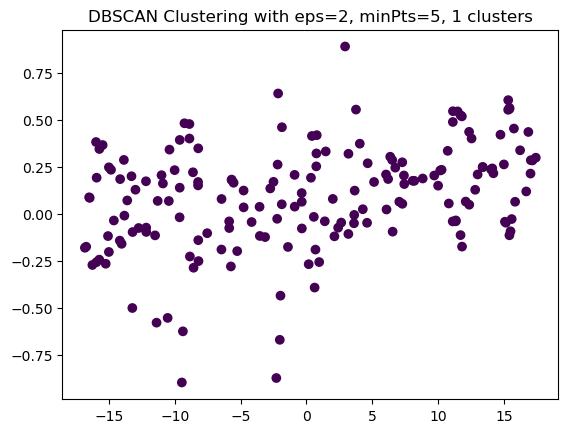

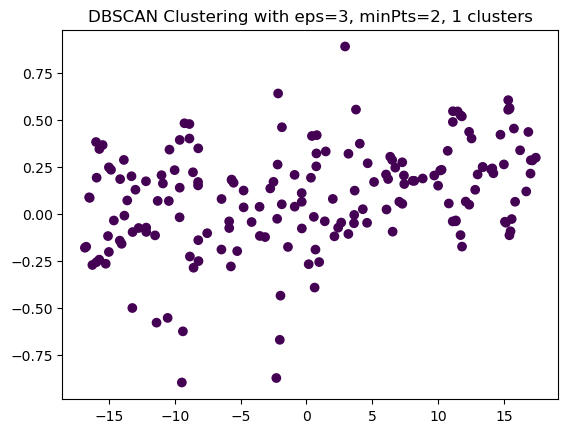

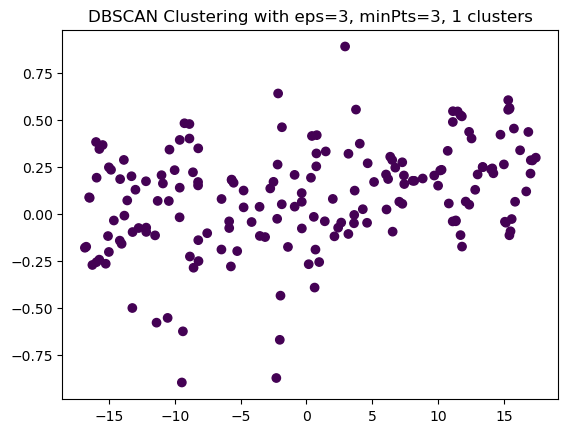

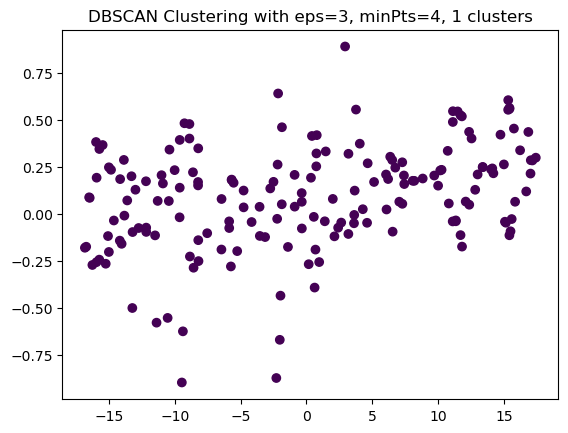

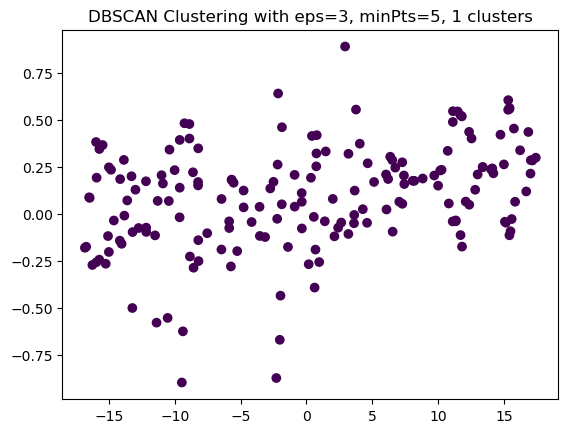

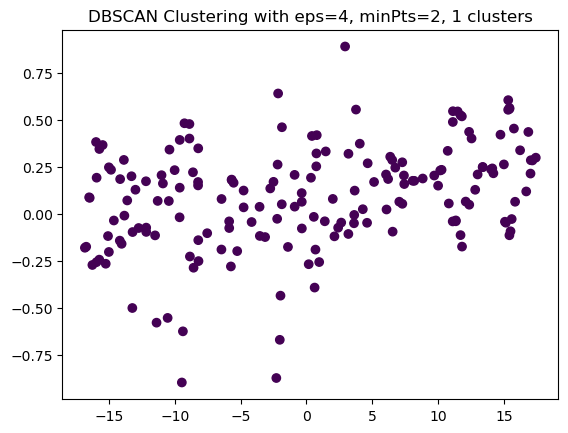

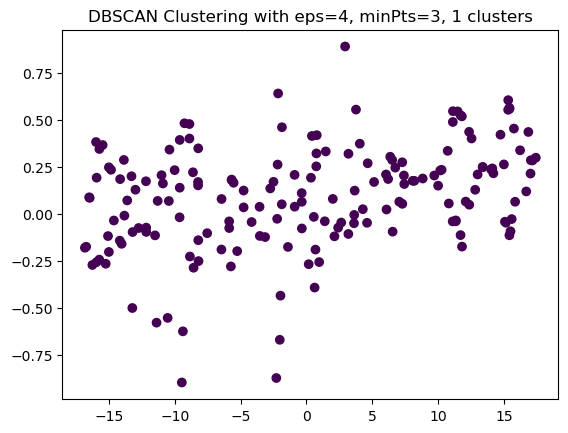

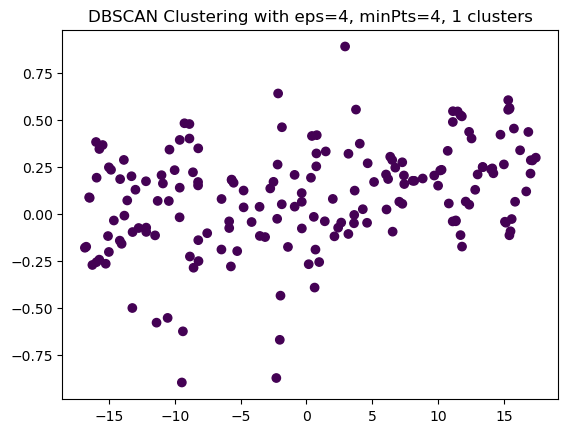

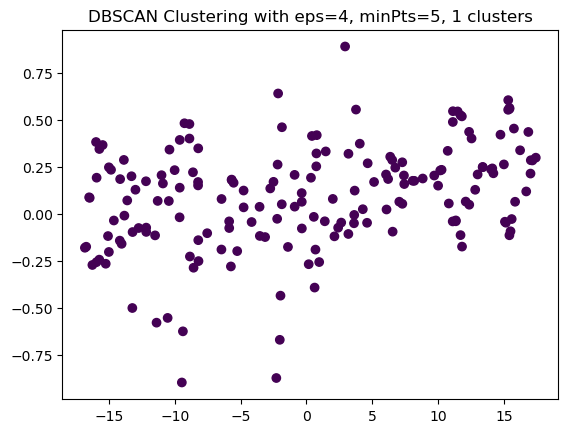

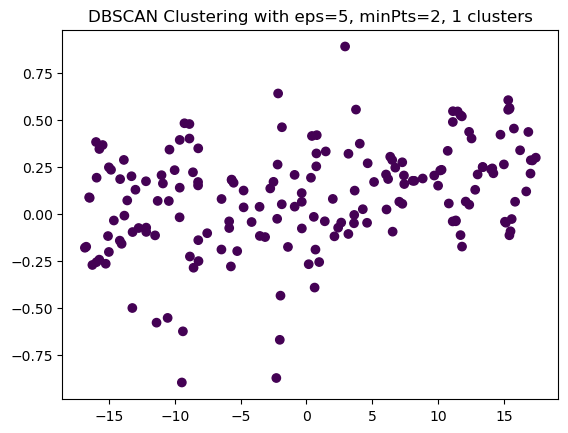

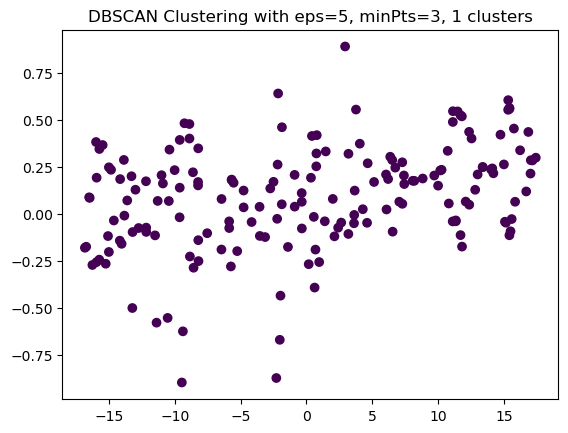

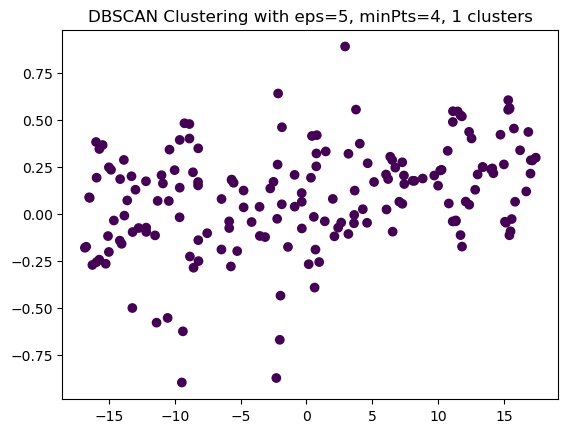

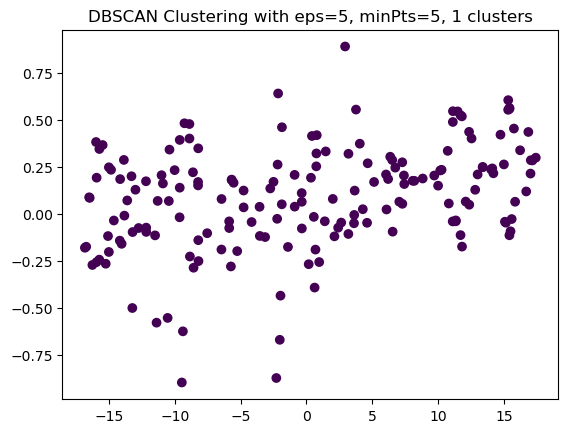

In [273]:
# experimenting with different values of epsilon and min_samples 
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_embedding = tsne.fit_transform(df)

# Use the embedding obtained earlier with t-SNE
embedding = tsne_embedding

# Define the range of values for epsilon and minPoints to experiment with
eps_range = [1, 2, 3, 4, 5]
minPts_range = [2, 3, 4, 5]

# Loop through all combinations of epsilon and minPoints and plot the resulting clusters
for eps in eps_range:
    for minPts in minPts_range:
        dbscan = DBSCAN(eps=eps, min_samples=minPts)
        clusters = dbscan.fit_predict(embedding)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # number of clusters, ignoring outliers
        
        # Plot the resulting clusters
        plt.figure()
        plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, cmap='viridis')
        plt.title('DBSCAN Clustering with eps={}, minPts={}, {} clusters'.format(eps, minPts, n_clusters))
        plt.show()

I was able to find that epsilon (1) will be able to capture more dense clusters and a low value for min_samples (5). The resulting plot shows each wine as a dot in a 2D space, colored according to its assigned cluster.

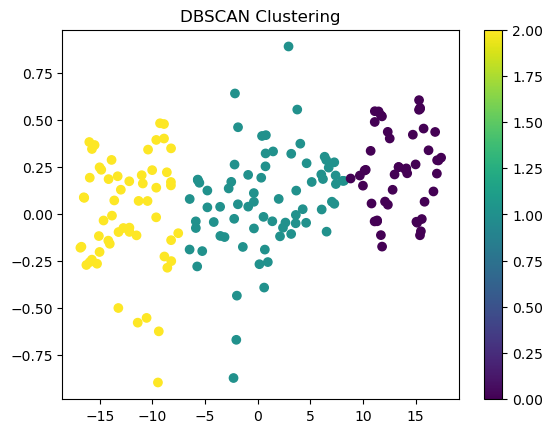

In [269]:
# gives good clusters 
from sklearn.cluster import DBSCAN
import numpy as np

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_embedding = tsne.fit_transform(df)

# Use the embedding obtained earlier with t-SNE
embedding = tsne_embedding

# Choose values of epsilon and min_samples
epsilon = 1
min_samples = 5

# Fit DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(embedding)

# Plot results
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.title('DBSCAN Clustering')
plt.show()

In DBSCAN, the two main hyperparameters are eps (epsilon) and min_samples. eps determines the size of the neighborhood around each point, while min_samples determines the minimum number of points required for a group to be considered a cluster.